# Preprocess PLIER pathway data and map gene symbols to Entrez IDs

In [1]:
import os
import urllib.request
import pandas as pd

import config as cfg
from scripts.symbol_to_entrez_id import symbol_to_entrez_id

## Get pathway .Rdata files from PLIER Github repo

#### These are originally derived from MSigDB.

In [2]:
if not os.path.exists(cfg.pathway_data):
    os.makedirs(cfg.pathway_data)
canonical_pathways = os.path.join(cfg.pathway_data, 'canonical_pathways.tsv')
oncogenic_pathways = os.path.join(cfg.pathway_data, 'oncogenic_pathways.tsv')
if (not os.path.exists(canonical_pathways)) or (not os.path.exists(oncogenic_pathways)):
    import subprocess
    r_script = os.path.join(os.getcwd(), 'scripts', 'get_plier_pathway_data.R')
    args = ['Rscript', r_script]
    subprocess.check_call(args)

In [3]:
canonical_df = pd.read_csv(canonical_pathways, sep='\t')
oncogenic_df = pd.read_csv(oncogenic_pathways, sep='\t')
first_cols = canonical_df.columns.values[0:5]
canonical_df.loc[:, first_cols].head()

,PID_CASPASE_PATHWAY,PID_P38ALPHABETADOWNSTREAMPATHWAY,REACTOME_APC_C_CDC20_MEDIATED_DEGRADATION_OF_MITOTIC_PROTEINS,REACTOME_REGULATION_OF_APOPTOSIS,REACTOME_IRON_UPTAKE_AND_TRANSPORT
UBE2Q1,0,0,0,0,0
UBE2Q2,0,0,0,0,0
PMM2,0,0,0,0,0
PMM1,0,0,0,0,0
NCBP1,0,0,0,0,0


In [4]:
first_cols = oncogenic_df.columns.values[0:5]
oncogenic_df.loc[:, first_cols].head()

,MYC_UP.V1_UP,PDGF_UP.V1_UP,BMI1_DN.V1_DN,SIRNA_EIF4GI_UP,CYCLIN_D1_KE_.V1_UP
RNF14,0,1,0,0,0
DUOXA1,0,0,0,0,0
RNF17,0,0,0,0,0
RNF10,0,0,0,0,0
RNF11,0,0,0,0,0


## Map canonical pathway data

In [5]:
gene_symbols = canonical_df.index.values
canonical_map = symbol_to_entrez_id(gene_symbols, verbose=True)
for i, (k, v) in enumerate(canonical_map.items()):
    if i >= 5: break
    print('{}\t{}'.format(k, v))

Querying for exact matches:
-- Matched 5832 of 6023 genes
Trying to manually map unmapped genes:
-- Matched 3 of 191 genes
Querying MyGene for aliases of 188 unmatched genes:
-- Found aliases for 187 of 188 genes
Querying for alias entrez IDs:
-- Matched 187 of 187 genes
RESULTS: matched 6022 of 6023 genes (0 duplicate Entrez IDs)
ADA	100
CDH2	1000
AKT3	10000
MED6	10001
ACOT8	10005


In [6]:
canonical_df = canonical_df.assign(eid=canonical_df.index.map(canonical_map))
unmapped_genes = canonical_df[canonical_df['eid'] == 'N/A']
canonical_df = (
    canonical_df.dropna(subset=['eid'])
    .set_index('eid')
)
del canonical_df.index.name
canonical_df.iloc[:5, :5]

,PID_CASPASE_PATHWAY,PID_P38ALPHABETADOWNSTREAMPATHWAY,REACTOME_APC_C_CDC20_MEDIATED_DEGRADATION_OF_MITOTIC_PROTEINS,REACTOME_REGULATION_OF_APOPTOSIS,REACTOME_IRON_UPTAKE_AND_TRANSPORT
55585,0,0,0,0,0
92912,0,0,0,0,0
5373,0,0,0,0,0
5372,0,0,0,0,0
4686,0,0,0,0,0


In [7]:
print('Number of gene symbols not mapped: {} ({})'.format(
    len(unmapped_genes), ' '.join(unmapped_genes.index.values)))

Number of gene symbols not mapped: 1 (CD97)


In [8]:
canonical_df.to_csv(os.path.join(cfg.pathway_data, 'canonical_mapped.tsv'),
                    sep='\t')

## Map oncogenic pathway data

In [9]:
gene_symbols = oncogenic_df.index.values
oncogenic_map = symbol_to_entrez_id(gene_symbols, verbose=True)
for i, (k, v) in enumerate(canonical_map.items()):
    if i >= 5: break
    print('{}\t{}'.format(k, v))

Querying for exact matches:
-- Matched 10287 of 11250 genes
Trying to manually map unmapped genes:
-- Matched 162 of 963 genes
Querying MyGene for aliases of 801 unmatched genes:
-- Found aliases for 706 of 801 genes
Querying for alias entrez IDs:
-- Matched 706 of 706 genes
RESULTS: matched 11155 of 11250 genes (0 duplicate Entrez IDs)
ADA	100
CDH2	1000
AKT3	10000
MED6	10001
ACOT8	10005


In [10]:
oncogenic_df = oncogenic_df.assign(eid=oncogenic_df.index.map(oncogenic_map))
unmapped_genes = oncogenic_df[oncogenic_df['eid'] == 'N/A']
oncogenic_df = (
    oncogenic_df.dropna(subset=['eid'])
    .set_index('eid')
)
del oncogenic_df.index.name
oncogenic_df.iloc[:5, :5]

,MYC_UP.V1_UP,PDGF_UP.V1_UP,BMI1_DN.V1_DN,SIRNA_EIF4GI_UP,CYCLIN_D1_KE_.V1_UP
9604,0,1,0,0,0
90527,0,0,0,0,0
56163,0,0,0,0,0
9921,0,0,0,0,0
26994,0,0,0,0,0


In [11]:
print('Number of gene symbols not mapped: {} ({})'.format(
    len(unmapped_genes), ' '.join(unmapped_genes.index.values)))

Number of gene symbols not mapped: 95 (C14orf113 PRO1621 MGC13053 LGALS6 FLJ39739 MS4A6D FLJ10246 MGC40069 FLJ13769 NAG18 KIAA0894 C10orf12 LILRP2 MGC50722 DKFZp547G183 MGC4771 HR44 MGC4294 MGC11082 KIAA1661 KIAA1660 MGC14436 KIAA0485 FLJ11827 FLJ45340 FLJ40292 FLJ13310 FLJ44054 C6orf147 CTSJ CTSQ PRO0478 FLJ22184 FLJ39051 FLJ11235 C15orf31 FLJ35024 MGC39584 DKFZp761E198 FLJ27352 MGC2848 KIAA1045 FLJ41649 C1orf20 HAB1 FLJ43663 CCL6 CCL9 DKFZP434C153 SPEER4F PRO1848 KIAA1804 DXS542 SCAMPER KIAA0509 KIAA0506 PRO2964 FLJ14107 MGC12935 MGC16142 KIAA0484 PRO1880 KIAA1659 MGC12488 DKFZp434J0226 FLJ14082 CD97 KIAA0125 C9orf38 FLJ14327 KIAA0492 MGC3771 GAGE3 MS4A6C CCBP2 FLJ21272 HSPC047 C14orf56 MS4A4C MS4A4B MS4A4D DKFZp566H0824 AD7C-NTP AGSK1 FLJ10661 HNRNPU-AS1 FLJ10038 HUMBINDC AKIRIN2-AS1 FLJ12120 DKFZP564C152 HSAJ2425 FLJ13197 FP588 MGC20647)


In [12]:
oncogenic_df.to_csv(os.path.join(cfg.pathway_data, 'oncogenic_mapped.tsv'),
                    sep='\t')

## Generate randomized pathway data from set of all TCGA genes

In [13]:
train_df = pd.read_csv(os.path.join(cfg.data_dir, 'train_tcga_expression_matrix_processed.tsv.gz'),
                       sep='\t', index_col=0)
test_df = pd.read_csv(os.path.join(cfg.data_dir, 'test_tcga_expression_matrix_processed.tsv.gz'),
                      sep='\t', index_col=0)
print(train_df.shape)
print(test_df.shape)

(9954, 16148)
(1106, 16148)


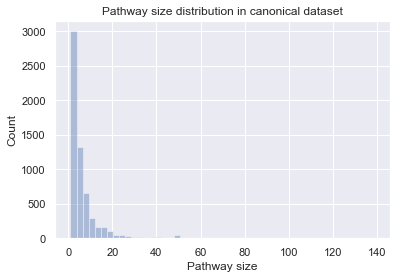

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(1)
sns.set()
sns.distplot(canonical_df.sum(axis=1).values, kde=False)
plt.xlabel('Pathway size')
plt.ylabel('Count')
plt.title('Pathway size distribution in canonical dataset')
plt.show()

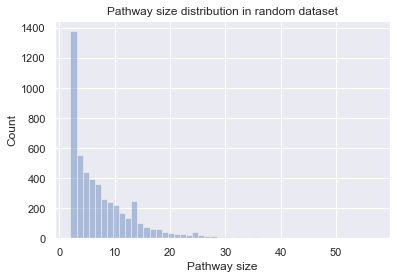

In [20]:
num_pws = 5000
num_genes = train_df.shape[1]
# geometric distribution gives a reasonable approximation to the
# pathway size distribution in the real pathway datasets
sim_counts = np.random.geometric(p=0.15, size=num_pws)+1
sns.distplot(sim_counts, kde=False)
plt.xlabel('Pathway size')
plt.ylabel('Count')
plt.title('Pathway size distribution in random dataset')
plt.show()

In [16]:
# generate random pathways with the size distribution from above,
# selecting genes uniformly at random for each pathway
sim_pws = np.zeros((num_pws, num_genes), dtype=int)
for i, pw_count in enumerate(sim_counts):
    sim_pw = np.zeros((num_genes,), dtype=int)
    sim_pw[0:pw_count] = 1
    np.random.shuffle(sim_pw)
    sim_pws[i, :] = sim_pw
print(sim_pws[1:10, 1:10])
print(np.sum(sim_pws, axis=1))

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
[ 5  9  2 ...  4 31  3]


In [17]:
pw_names = ['PW{}'.format(i) for i in range(1, num_pws+1)]
sim_df = pd.DataFrame(data=sim_pws, index=pw_names, columns=train_df.columns).T
print(sim_df.head())

       PW1  PW2  PW3  PW4  PW5  PW6  PW7  PW8  PW9  PW10  ...  PW4991  PW4992  \
1        0    0    0    0    0    0    0    0    0     0  ...       0       0   
10       0    0    0    0    0    0    0    0    0     0  ...       0       0   
100      0    0    0    0    0    0    0    0    0     0  ...       0       0   
1000     0    0    0    0    0    0    0    0    0     0  ...       0       0   
10000    0    0    0    0    0    0    0    0    0     0  ...       0       0   

       PW4993  PW4994  PW4995  PW4996  PW4997  PW4998  PW4999  PW5000  
1           0       0       0       0       0       0       0       0  
10          0       0       0       0       0       0       0       0  
100         0       0       0       0       0       0       0       0  
1000        0       0       0       0       0       0       0       0  
10000       0       0       0       0       0       0       0       0  

[5 rows x 5000 columns]


In [18]:
sim_df.to_csv(os.path.join(cfg.pathway_data, 'randomized_pathways.tsv'),
              sep='\t')